# Example 4: generate a Nerve with its context


This example shows how to easily generate and save a fascicle with the following contexts:

 - Intracellular context**: A current attached to all axons at $x=0$.
 - Recording context** : An analytical recorder is added with three recording points located at $x\in\{\frac{L}{4}, \frac{L}{2}, \frac{4L}{4}\}$, $y=0$, $z=100$.
 - Extracellular context**: A LIFE electrode is added to the centre of the fascicle $x=\frac{L}{2}$, $y=0$, $z=0$.

This example can be used as a model to generate all sorts of fascicles with a customised context. For instance, it is used to generate the simulation context for many other examples in this documentation.

In [13]:

import matplotlib.pyplot as plt
import os
import sys


sys.path.append("../")
import nrv
test_name = "./example_4/"


dir_res = f"./{test_name}/"
if not os.path.isdir(dir_res):
    os.mkdir(dir_res)

nerve_file = dir_res + "nerve.json"

## Geometry declaration

In [14]:
outer_d = 5 # mm
nerve_d = 500 # um
nerve_l = 5000 # um

fasc1_d = 200 # um
fasc1_y = -100
fasc1_z = 0


fasc2_d = 100 # um
fasc2_y = 100
fasc2_z = 0

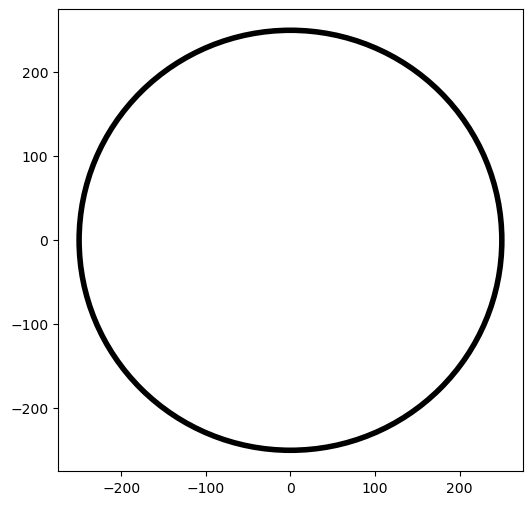

In [15]:
nerve_1 = nrv.nerve(length=nerve_l, diameter=nerve_d, Outer_D=outer_d)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve_1.plot(fig, ax)

## Adding Fascicles

In [16]:
n_ax1 = 200

axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)


fascicle_1 = nrv.fascicle(ID=1)
fascicle_1.define_circular_contour(fasc1_d)
fascicle_1.fill_with_population(axons_diameters, axons_type, Delta=5)
fascicle_1.generate_random_NoR_position()

NRV INFO: On 200 axons to generate, there are 60 Myelinated and 140 Unmyelinated
NRV WARNING: Warning: the specified population maybe too small to fill the current fascicle
NRV INFO: 
 ... 200 axons loaded
NRV INFO: Axon packing initiated. This might take a while...


  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [00:03<00:00, 5453.00it/s]

NRV INFO: Packing done!


In [17]:
n_ax2 = 70

axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax2, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)


fascicle_2 = nrv.fascicle(ID=2)
fascicle_2.define_circular_contour(fasc2_d)
fascicle_2.fill_with_population(axons_diameters, axons_type, Delta=5)
fascicle_2.generate_random_NoR_position()

NRV INFO: On 70 axons to generate, there are 21 Myelinated and 49 Unmyelinated
NRV WARNING: Warning: the specified population maybe too small to fill the current fascicle
NRV INFO: 
 ... 70 axons loaded
NRV INFO: Axon packing initiated. This might take a while...


100%|██████████| 20000/20000 [00:00<00:00, 20746.63it/s]

NRV INFO: Packing done!


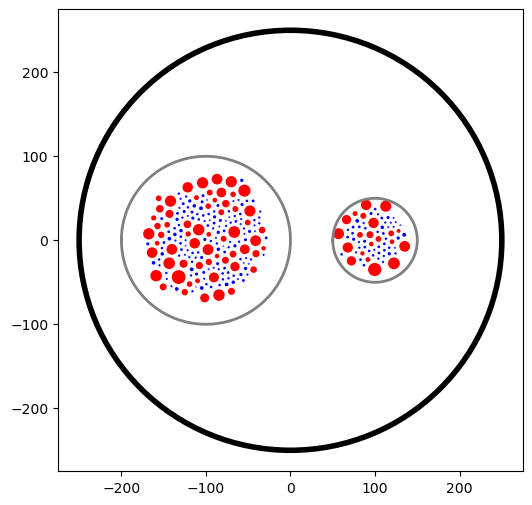

In [18]:
nerve_1.add_fascicle(fascicle=fascicle_1, y=fasc1_y, z=fasc1_z)
nerve_1.add_fascicle(fascicle=fascicle_2, y=fasc2_y, z=fasc2_z)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve_1.plot(fig, ax)


## Define the Context

**\- The intracellular context**

In [19]:
position = 0.
t_start = 1
duration = 0.5
amplitude = 4
nerve_1.insert_I_Clamp(position, t_start, duration, amplitude)

**\- The extracellular context**

In contrast with axon level simulation, the geometry does not have to be specified in the ``FEM_stimulation``. The geometrical parameters are automatically set in the FEM model when ``nerve_1.attach_extracellular_stimulation`` is done. 

Note that an electrode overlapping with a fascicle perineurium cannot be added to the nerve (a warning will be rose if this appends)

In [20]:
# electrode and stimulus parameters
start = 1
I_cathod = 40
I_anod = I_cathod/5
T_cathod = 60e-3
T_inter = 40e-3

life_d = 25
life_length = 1000

life_y_c_0 = 0
life_z_c_0 = 100
life_y_c_1 = fasc1_y
life_z_c_1 = fasc1_z
life_y_c_2 = fasc2_y
life_z_c_2 = fasc2_z

# LIFE in neither of the two fascicles
LIFE_stim0 = nrv.FEM_stimulation()
life_x_0_offset = (nerve_l-life_length)/2
elec_0 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_0_offset, life_y_c_0, life_z_c_0)

stim0 = nrv.stimulus()
stim0.biphasic_pulse(start, I_cathod, T_cathod, I_anod, T_inter)
LIFE_stim0.add_electrode(elec_0, stim0)
nerve_1.attach_extracellular_stimulation(LIFE_stim0)


# LIFE in the fascicle 1
LIFE_stim1 = nrv.FEM_stimulation()

life_x_1_offset = (nerve_l-life_length)/2
elec_1 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_1_offset, life_y_c_1, life_z_c_1)
# stimulus def
stim1 = nrv.stimulus()
stim1.biphasic_pulse(start, I_cathod, T_cathod, I_anod, T_inter)
LIFE_stim1.add_electrode(elec_1, stim1)
nerve_1.attach_extracellular_stimulation(LIFE_stim1)

# LIFE in the fascicle 2
LIFE_stim2 = nrv.FEM_stimulation()
life_x_2_offset = (nerve_l-life_length)/2
elec_2 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_2_offset, life_y_c_2, life_z_c_2)

stim2 = nrv.stimulus()
stim2.biphasic_pulse(start, I_cathod, T_cathod, I_anod, T_inter)
LIFE_stim2.add_electrode(elec_2, stim2)
nerve_1.attach_extracellular_stimulation(LIFE_stim2)


NRV INFO: From Fascicle 1: Electrode/Axons overlap, 7 axons will be removed from the fascicle
NRV INFO: 200 axons remaining
NRV INFO: From Fascicle 2: Electrode/Axons overlap, 10 axons will be removed from the fascicle
NRV INFO: 70 axons remaining


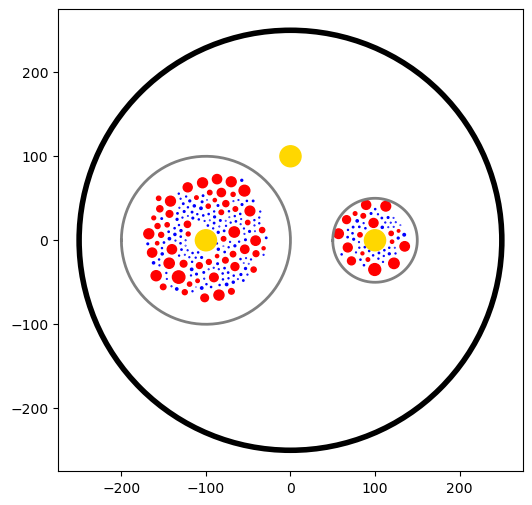

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve_1.plot(fig, ax)

## Save/Load Fascicle

As the ``fascicle``-class inherits from ``NRVClass``, the save and load methods can be used to generate a python dictionary or save the properties of the fascicle (see `usersguide`). 

As for all ``simulable``-class instances, contexts are not saved and loaded by default. One need specifies which context to save and load using boolean arguments ``extracel_context``,``intracel_context``, ``rec_context``.

**Notes**
 - *Because fascicles can take a long time to generate, the `document` class is one of the few classes in NRV for which save saves automatically (without specifying `save=True` in the argument). If note is specified, the document will be saved in the current directory in `fascicle.json`*.
 - *The footprint of the electrodes on the axon can be generated before saving using ``compute_electrodes_footprints``. This can increase the file size but also significantly reduce the computation time of the loaded fascicle simulation*.

**<u>Warning</u>** 
 - *Some fascicle parameters (length, diameter, ...) cannot be modified if footprints are calculated*.

Text(0.5, 1.0, 'Fascicle loaded')

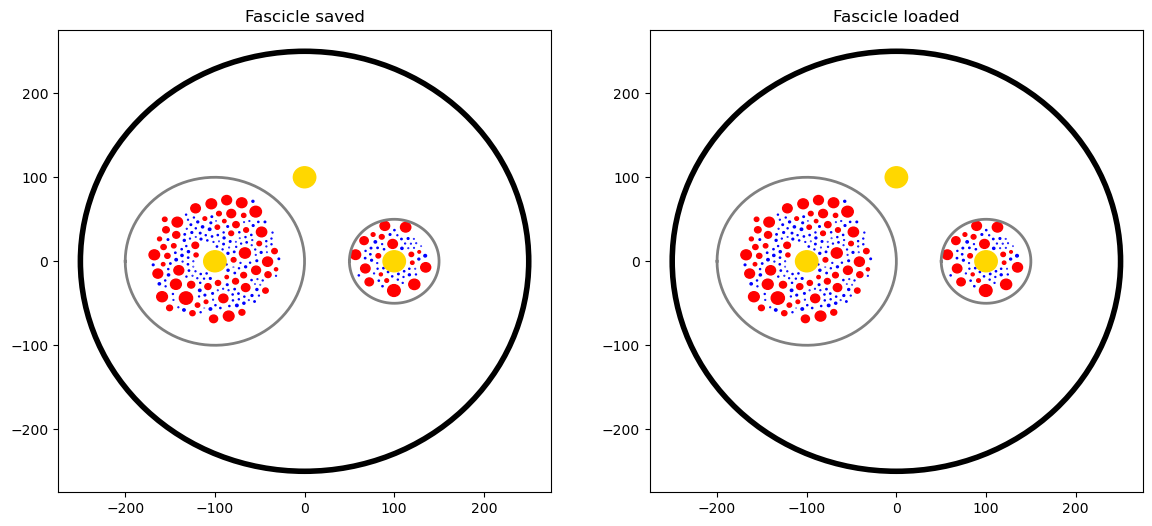

In [22]:
nerve_1.save(fname=nerve_file,extracel_context=True,intracel_context=True)
nrv.synchronize_processes()
nerve_2 = nrv.load_any(nerve_file,extracel_context=True,intracel_context=True)


fig, ax = plt.subplots(1, 2, figsize=(14,6))
nerve_1.plot(fig, ax[0])
ax[0].set_title("Fascicle saved")
nerve_2.plot(fig, ax[1])
ax[1].set_title("Fascicle loaded")


# Sup 

A new fascicle still can be added after the nerve loading

*Peut-être pour un autre exemple pour pas trop alourdir l'exemple*

NRV INFO: On 200 axons to generate, there are 60 Myelinated and 140 Unmyelinated
NRV WARNING: Warning: the specified population maybe too small to fill the current fascicle
NRV INFO: 
 ... 200 axons loaded
NRV INFO: Axon packing initiated. This might take a while...


100%|██████████| 20000/20000 [00:03<00:00, 5844.44it/s]


NRV INFO: Packing done!
NRV INFO: From Fascicle 3: Electrode/Axons overlap, 8 axons will be removed from the fascicle
NRV INFO: 96 axons remaining


Text(0.5, 1.0, 'Fascicle loaded')

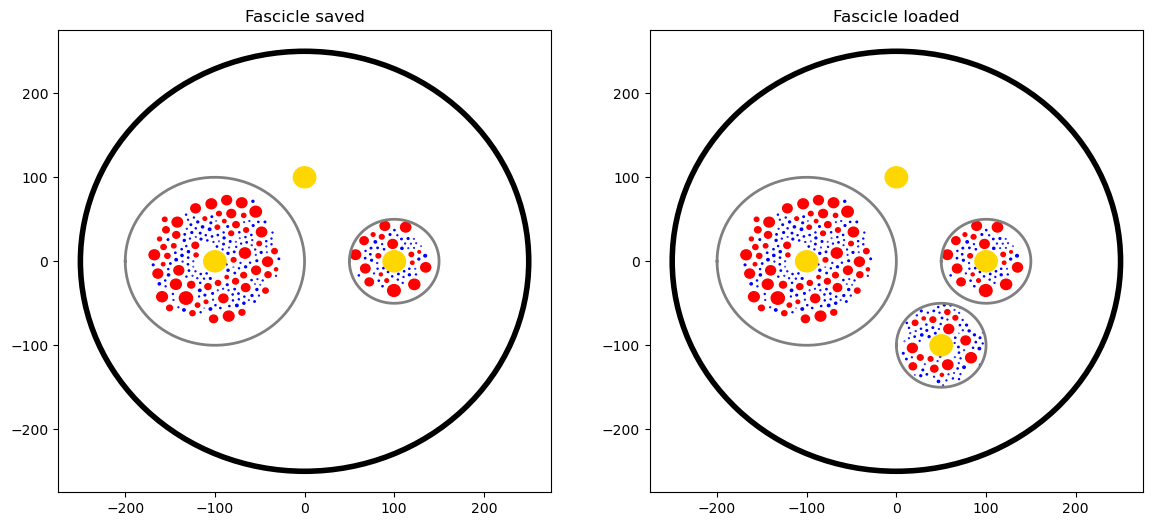

In [23]:
n_ax3 = 40
fasc3_d = 100 # um
fasc3_y = 50
fasc3_z = -100

life_y_c_3 = fasc3_y
life_z_c_3 = fasc3_z

axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)


fascicle_3 = nrv.fascicle(ID=3)
fascicle_3.define_circular_contour(fasc3_d, fasc3_y, fasc3_z)
fascicle_3.fill_with_population(axons_diameters, axons_type, Delta=5)
fascicle_3.generate_random_NoR_position()


# LIFE in the fascicle 3
LIFE_stim3 = nrv.FEM_stimulation()
life_x_3_offset = (nerve_l-life_length)/2
elec_3 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_3_offset, life_y_c_3, life_z_c_3)

stim3 = nrv.stimulus()
stim3.biphasic_pulse(start, I_cathod, T_cathod, I_anod, T_inter)
LIFE_stim3.add_electrode(elec_3, stim3)
fascicle_3.attach_extracellular_stimulation(LIFE_stim3)

nerve_2.add_fascicle(fascicle=fascicle_3, intracel_context=True)


fig, ax = plt.subplots(1, 2, figsize=(14,6))
nerve_1.plot(fig, ax[0])
ax[0].set_title("Fascicle saved")
nerve_2.plot(fig, ax[1])
ax[1].set_title("Fascicle loaded")

NRV INFO: On 200 axons to generate, there are 60 Myelinated and 140 Unmyelinated
NRV INFO: 
 ... 200 axons loaded
NRV INFO: Axon packing initiated. This might take a while...


100%|██████████| 20000/20000 [00:03<00:00, 5029.18it/s]


NRV INFO: Packing done!
NRV INFO: From Fascicle 4: Electrode/Axons overlap, 12 axons will be removed from the fascicle
NRV INFO: 24 axons remaining


Text(0.5, 1.0, 'Fascicle loaded')

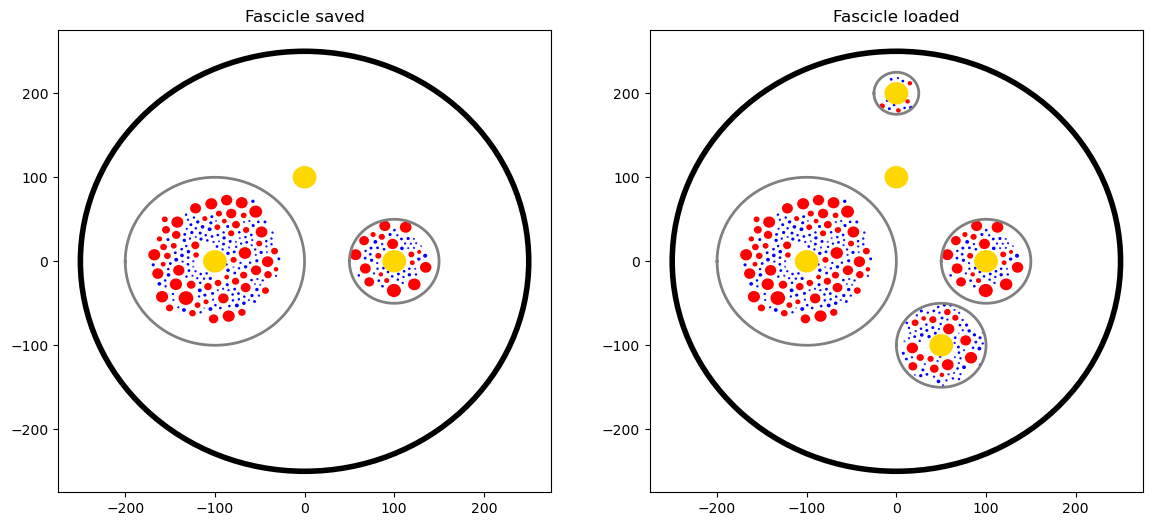

In [24]:
n_ax4 = 40
fasc4_d = 50 # um
fasc4_y = 0
fasc4_z = 200

life_y_c_4 = 0
life_z_c_4 = 0

axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)


fascicle_4 = nrv.fascicle(ID=4)
fascicle_4.define_circular_contour(fasc4_d)
fascicle_4.fill_with_population(axons_diameters, axons_type, Delta=5)
fascicle_4.generate_random_NoR_position()


# LIFE in the fascicle 4
LIFE_stim4 = nrv.FEM_stimulation()
life_x_4_offset = (nerve_l-life_length)/2
elec_4 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_4_offset, life_y_c_4, life_z_c_4)

stim4 = nrv.stimulus()
stim4.biphasic_pulse(start, I_cathod, T_cathod, I_anod, T_inter)
LIFE_stim4.add_electrode(elec_4, stim4)
fascicle_4.attach_extracellular_stimulation(LIFE_stim4)

nerve_2.add_fascicle(fascicle=fascicle_4, y=fasc4_y, z=fasc4_z, intracel_context=True)


fig, ax = plt.subplots(1, 2, figsize=(14,6))
nerve_1.plot(fig, ax[0])
ax[0].set_title("Fascicle saved")
nerve_2.plot(fig, ax[1])
ax[1].set_title("Fascicle loaded")